# Pandas Tutorial and Data exploration <a name="introduction"></a>


Pandas is a Python library that provides high performance easy to use data structures and data analysis tools.

This notebook will provide a small tutorial on using the Pandas library, and at the same time perform a small exploratory data analysis.

The data chosen for this purpose is the results of a survey of StarCraft 2 players ( https://www.kaggle.com/danofer/skillcraft ). In this survey the subjects were asked about their leaderboard rank, age, and time spent playing. In addition, the players provided some of their game replays, from which several performance metrics were extracted.

This metrics include actions per minute (APM), minimap usage, hotkey usage, and game length

# Table of Contents
1. [Introduction](#introduction)
2. [Using Pandas](#using)
3. [IO Tools](#tools)
4. [Indexing and Selecting Data](#indexing)
5. [Setting Data](#setting)
6. [Dealing With Missing Data](#missing)
7. [Plotting Data and Exploratory Analysis](#plotting)

    7.1. [League Ranking](#rank)
    
    7.2. [Age](#age)
    
    7.3. [Other Considerations](#other)

## Using Pandas <a name="using"></a>

To use Pandas, install Python 3.0 and the Pandas libarary using your preferred package management tools. Then import the library

In [1]:
import pandas

## IO tools <a name="tools"></a>

The first step in using Pandas is obtaining the data that will be analyzed. Pandas provides tools to parse from many different sources, including CSV, JSON, HTLM, Excel, and a whole host of other formats.

Once imported, the data is stored in two types of objects: Series, for 1D homogenous arrays, DataFrame, for 2D tabular arrays, and Panel, for larger dimensional arrays.

For example, to read a CSV data source create a handle to the file and call the read_csv function, which returns a DataFrame:

In [2]:
with open('./starcraft.csv', 'r') as file_handle:
    sc_data = pandas.read_csv(file_handle)

Once imported, Pandas can start manipulating the data immediately. For example, showing the top rows, or providing a summary of the values available:

In [3]:
sc_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


In [4]:
sc_data.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,3395.000000,3395.000000,3340.000000,3339.000000,3338.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,...,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,21.647904,15.910752,960.421809,117.046947,0.004299,0.000374,0.000059,0.000098,...,0.003463,40.361562,63.739403,5.272988,0.000283,0.001032,0.000085,0.000059,0.000142,83598.229161
std,2719.944851,1.517327,4.206341,11.962912,17318.133922,51.945291,0.005284,0.000225,0.000038,0.000166,...,0.000992,17.153570,19.238869,1.494835,0.000087,0.000519,0.000025,0.000111,0.000265,33497.667966
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,...,0.000679,6.666700,24.093600,2.038900,0.000091,0.000077,0.000020,0.000000,0.000000,25224.000000
25%,2464.500000,3.000000,19.000000,8.000000,300.000000,79.900200,0.001258,0.000204,0.000033,0.000000,...,0.002754,28.957750,50.446600,4.272850,0.000224,0.000683,0.000068,0.000000,0.000000,60090.000000
50%,4874.000000,4.000000,21.000000,12.000000,500.000000,108.010200,0.002500,0.000353,0.000053,0.000040,...,0.003395,36.723500,60.931800,5.095500,0.000270,0.000905,0.000082,0.000000,0.000020,81012.000000
75%,7108.500000,5.000000,24.000000,20.000000,800.000000,142.790400,0.005133,0.000499,0.000079,0.000119,...,0.004027,48.290500,73.681300,6.033600,0.000325,0.001259,0.000099,0.000086,0.000181,102074.000000
max,10095.000000,8.000000,44.000000,168.000000,1000000.000000,389.831400,0.043088,0.001752,0.000338,0.003019,...,0.007971,237.142900,176.372100,18.558100,0.000832,0.005149,0.000202,0.000902,0.003084,388032.000000


## Indexing and Selecting Data <a name="indexing"></a>

Pandas supports multiple ways of referencing data in their structures, such as indexes, labels, etc, all of which use standar Python syntax, and return in the appropiate dimension (For example, accessing a column in a DataFrame returns a Series). For performance it is recomended to use .loc, .iloc, .at and .iat in production code

Using a dict syntax returns the appropiate column

In [5]:
sc_data['GameID'].head()

0    52
1    55
2    56
3    57
4    58
Name: GameID, dtype: int64

Integers or ranges return rows

In [6]:
sc_data[0:2].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812


The method .loc allows combined use:

In [7]:
sc_data.loc[0:2, ['Age', 'TotalHours']]

,Age,TotalHours
0,27.0,3000.0
1,23.0,5000.0
2,30.0,200.0


The access method .iloc is used for integer selection, and the method .at is used to extract specific scalars:

In [8]:
sc_data.at[1, 'Age']

23.0

Finally, boolean indexing can be used to extract values according to criteria:

In [9]:
sc_data[(sc_data['Age'] >= 27) & (sc_data['Age'] < 30)].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.000000,0.000000,127448
5,60,2,27.0,6.0,70.0,44.4570,0.000978,0.000255,0.000021,0.000000,...,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.000000,0.000000,94032
16,105,4,28.0,8.0,2000.0,50.8374,0.000664,0.000221,0.000018,0.000018,...,0.002656,45.7902,76.8889,3.5000,0.000240,0.000664,0.000111,0.000000,0.000295,54208
53,213,4,29.0,12.0,800.0,66.6738,0.000321,0.000046,0.000023,0.000000,...,0.002292,38.5126,72.1600,5.4600,0.000229,0.001031,0.000103,0.000252,0.000149,87256
54,215,2,27.0,24.0,250.0,73.9722,0.002647,0.000455,0.000052,0.000007,...,0.002685,58.8858,88.6889,4.4111,0.000179,0.000582,0.000060,0.000104,0.000239,134100


Care should be taken when manipulating the values returned by selection, because some are returned by copy and others by reference, depending on the context.

Outside of the scope of this tutorial, Panda offers a whole host of other methods to query the data, such as where(), mask(), query(), lookup() and lot of others.

## Setting Data <a name="setting"></a>

The previously seen selection and indexing methods can be used to change data in the DataFrame. Note that Pandas automatically aligns data by the indexes.

Scalar assignments copy over the whole column, otherwise the dimensions must match.

In [10]:
temp = sc_data.loc[:, 'Age']
sc_data.loc[:,'Age'] = 20
sc_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,20,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,20,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,20,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,20,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,20,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


The following is just to undo the previous operation

In [11]:
sc_data.loc[:, 'Age'] = temp
sc_data.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.0,10.0,3000.0,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.0,0.000000,127448
1,55,5,23.0,10.0,5000.0,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.0,0.000208,57812
2,56,4,30.0,10.0,200.0,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.0,0.000189,95360
3,57,3,19.0,20.0,400.0,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.0,0.000384,93852
4,58,3,32.0,10.0,500.0,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.0,0.000019,51936


## Dealing With Missing Data <a name="missing"></a>

Pandas has many tools to manipulate data into any shape of interest to the researcher. In particular, missing data is often an issue that must be dealt with before the investigation can continue.

The .isna() function of Pandas will return a mask of the DataFrame indicating where are the missing values, which can be used for selecting and overwritting the values.

For example, we can then use this to see which columns have NaN values

In [12]:
sc_data.columns[sc_data.isna().any()].tolist()

['Age', 'HoursPerWeek', 'TotalHours']

We can see here that for some of our rows we have missing values in the Age, HoursPerWeek and TotalHours columns. To aid with future manipulation, we will replace these missing values with the mean for the associated column:

In [13]:
sc_data.fillna(sc_data.mean())

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,52,5,27.000000,10.000000,3000.000000,143.7180,0.003515,0.000220,0.000055,0.000110,...,0.004849,32.6677,40.8673,4.7508,0.000220,0.001397,0.000047,0.000000,0.000000,127448
1,55,5,23.000000,10.000000,5000.000000,129.2322,0.003304,0.000259,0.000069,0.000294,...,0.004307,32.9194,42.3454,4.8434,0.000381,0.001194,0.000087,0.000000,0.000208,57812
2,56,4,30.000000,10.000000,200.000000,69.9612,0.001101,0.000336,0.000042,0.000294,...,0.002926,44.6475,75.3548,4.0430,0.000231,0.000745,0.000063,0.000000,0.000189,95360
3,57,3,19.000000,20.000000,400.000000,107.6016,0.001034,0.000213,0.000011,0.000053,...,0.003783,29.2203,53.7352,4.9155,0.000202,0.000426,0.000075,0.000000,0.000384,93852
4,58,3,32.000000,10.000000,500.000000,122.8908,0.001136,0.000327,0.000039,0.000000,...,0.002368,22.6885,62.0813,9.3740,0.000289,0.001174,0.000077,0.000000,0.000019,51936
5,60,2,27.000000,6.000000,70.000000,44.4570,0.000978,0.000255,0.000021,0.000000,...,0.002425,76.4405,98.7719,3.0965,0.000170,0.000372,0.000064,0.000000,0.000000,94032
6,61,1,21.000000,8.000000,240.000000,46.9962,0.000820,0.000169,0.000067,0.000000,...,0.001988,94.0227,90.5311,4.1017,0.000169,0.000573,0.000056,0.000000,0.000000,89012
7,72,7,17.000000,42.000000,10000.000000,212.6022,0.009040,0.000676,0.000060,0.001164,...,0.004952,24.6117,41.7671,6.6104,0.000448,0.002277,0.000090,0.000129,0.000249,100556
8,77,4,20.000000,14.000000,2708.000000,117.4884,0.002944,0.000527,0.000019,0.000019,...,0.005399,52.0140,46.4321,3.3746,0.000273,0.001035,0.000066,0.000273,0.000470,106308
9,81,4,18.000000,24.000000,800.000000,155.9856,0.005054,0.000524,0.000100,0.000025,...,0.003569,24.4632,52.1538,6.5664,0.000337,0.001310,0.000075,0.000000,0.000000,80136


## Plotting Data and Exploratory Analysis <a name="plotting"></a>

### League ranking <a name="rank"></a>

Now that the data has been cleaned up, we can start plotting and looking for trends. Since the dataset includes leaderboard ranking and performance metrics, we can search for which metrics correspond to a higher leaderboard ranking

The first metric to look into is APM (actions per minute). This metric has commonly been mentioned as indicative of skillful play in StarCraft 2

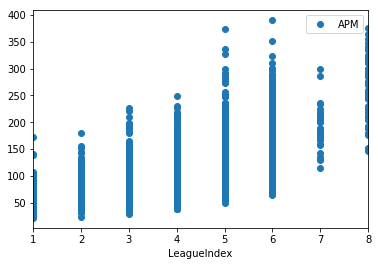

In [14]:
%matplotlib inline
sc_data.plot(x='LeagueIndex', y='APM', style='o')

We can see there is a strong correlation betwen APM and leaderboard rank, with APM trending upward as the rank increases. However, the metric is not absolute, as we can see that the highest APM in the lowest rank is comparable to the lowest APM in the highest rank.

We should look at the other performance metrics and how they correlate. DataFrame.corr() calculates the pairwise correlation of columns, like so:

In [15]:
print(sc_data.corr()['LeagueIndex'].nlargest())
print()
print(sc_data.corr()['LeagueIndex'].nsmallest())

LeagueIndex        1.000000
APM                0.662309
NumberOfPACs       0.612192
AssignToHotkeys    0.531125
SelectByHotkeys    0.490599
Name: LeagueIndex, dtype: float64

ActionLatency    -0.673939
GapBetweenPACs   -0.553246
Age              -0.127825
MaxTimeStamp     -0.003790
TotalHours        0.023884
Name: LeagueIndex, dtype: float64


From here we see that the columns most correlated to LeagueIndex are APM, ActionLatency (AL), and NumberOfPACs (NOP) (PAC stands for Perception Action Cycle, a camera move followed by actions and then a camera move).

Plotting these columns:

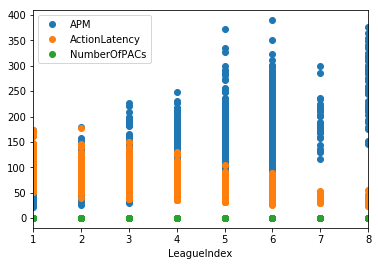

In [16]:
%matplotlib inline
sc_data.plot(x='LeagueIndex', y=['APM','ActionLatency','NumberOfPACs'], style='o')

This last plot is not very useful because of scaling problems. APM ranges from 20 to 400, while other column's values are all below 1. Let's scale all values so that the min value for a columin is always zero and the max value is always 1:

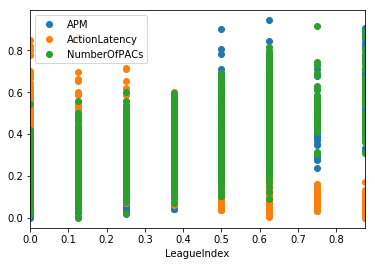

In [17]:
scaled_sc_data = sc_data.copy(deep=True)
for col in scaled_sc_data[:]:
    scaled_sc_data[col] = (scaled_sc_data[col]-scaled_sc_data[col].min())/scaled_sc_data[col].max()

scaled_sc_data.plot(x='LeagueIndex', y=['APM','ActionLatency', 'NumberOfPACs'], style='o')

Now it is easy to to see that as the league rank increases, so does the APM and NOP, while the AL goes down with rank. At this point, we could start looking into predicting leaderboard ranking according to these metrics.

### Age <a name="age"></a>

Another topic of interest could be experience, and whether age can have an effect on the ability to perform in the game

In [18]:
print(sc_data.corr(method='spearman')['Age'].nlargest())
print()
print(sc_data.corr(method='spearman')['Age'].nsmallest())

Age               1.000000
ActionLatency     0.179800
GapBetweenPACs    0.097561
GameID            0.096992
MinimapAttacks    0.085559
Name: Age, dtype: float64

HoursPerWeek      -0.208218
APM               -0.185088
NumberOfPACs      -0.151005
SelectByHotkeys   -0.143794
WorkersMade       -0.083683
Name: Age, dtype: float64


In a previous cell we saw that LeagueIndex and Age were not very correlated (-0.128). In this case we used Spearman's rank relation coefficient, and it shows an inverse relation between Age and HoursPerWeek. It would seem that as people grow older, they dedicate less time to the game.

We can also see that AL and APM are affected adversely by age, so older players in higher ranks must be compensating by improving other metrics not seen in this data.

### Other Considerations <a name="other"></a>

We have seen a glimpse of all the powerful tools that Pandas provides. This short tutorial will conclude with a small example of other functions available.

The website www.datasciencemadesimple.com provides a lot of other examples with explanations.

Standard deviation:

In [19]:
sc_data.std()

GameID                 2719.944851
LeagueIndex               1.517327
Age                       4.206341
HoursPerWeek             11.962912
TotalHours            17318.133922
APM                      51.945291
SelectByHotkeys           0.005284
AssignToHotkeys           0.000225
UniqueHotkeys             0.000038
MinimapAttacks            0.000166
MinimapRightClicks        0.000377
NumberOfPACs              0.000992
GapBetweenPACs           17.153570
ActionLatency            19.238869
ActionsInPAC              1.494835
TotalMapExplored          0.000087
WorkersMade               0.000519
UniqueUnitsMade           0.000025
ComplexUnitsMade          0.000111
ComplexAbilityUsed        0.000265
MaxTimeStamp          33497.667966
dtype: float64

Pivot tables:

In [20]:
pandas.pivot_table(sc_data, index=['LeagueIndex', 'APM'], aggfunc='mean').head()

ActionLatency  ActionsInPAC   Age  AssignToHotkeys  \
LeagueIndex APM                                                           
1           22.0596       147.5306        2.8469  37.0         0.000033   
            24.9042       141.8931        2.4885  22.0         0.000043   
            25.4442       165.1613        4.3548  30.0         0.000160   
            25.6062       143.2381        3.3061  24.0         0.000121   
            28.1118       168.9249        3.1792  16.0         0.000070   

                     ComplexAbilityUsed  ComplexUnitsMade  GameID  \
LeagueIndex APM                                                     
1           22.0596            0.000016           0.00009  9185.0   
            24.9042            0.000000           0.00000  3801.0   
            25.4442            0.000000           0.00000  8755.0   
            25.6062            0.000000           0.00000  1016.0   
            28.1118            0.000000           0.00000  8196.0   

                     GapBetweenPACs  HoursPerWeek  MaxTimeStamp  \
LeagueIndex APM                                                   
1           22.0596        134.1128          12.0        122892   
            24.9042         75.3538          24.0         69736   
            25.4442        113.2000          12.0         31188   
            25.6062         74.8219          16.0         99140   
            28.1118        160.9535          24.0        114792   

                     MinimapAttacks  MinimapRightClicks  NumberOfPACs  \
LeagueIndex APM                                                         
1           22.0596        0.000016            0.000033      0.001595   
            24.9042        0.000029            0.000100      0.001879   
            25.4442        0.000192            0.000064      0.000994   
            25.6062        0.000000            0.000030      0.001483   
            28.1118        0.000000            0.000000      0.001507   

                     SelectByHotkeys  TotalHours  TotalMapExplored  \
LeagueIndex APM                                                      
1           22.0596         0.000024       300.0          0.000146   
            24.9042         0.000301       100.0          0.000186   
            25.4442         0.000385       150.0          0.000224   
            25.6062         0.000212        60.0          0.000161   
            28.1118         0.000575       730.0          0.000148   

                     UniqueHotkeys  UniqueUnitsMade  WorkersMade  
LeagueIndex APM                                                   
1           22.0596       0.000024         0.000073     0.000350  
            24.9042       0.000043         0.000072     0.000459  
            25.4442       0.000096         0.000064     0.000385  
            25.6062       0.000010         0.000071     0.000393  
            28.1118       0.000044         0.000026     0.000714